In [ ]:
# https://stepik.org/lesson/223852/step/1?unit=196663

# Разбор Titanic ML competition с Kaggle

In [107]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [5]:
# импорт датасета

df = pd.read_csv('C:\\Users\\Nike\\JNotebook\\Datasets\\Titanic\\train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
# проверка количества пропущенных значений в датасете

df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [14]:
# удаление из вектора X ненужных колонок

X = df.drop(['PassengerId', 'Survived', 'Name', 'Ticket', 'Cabin'], axis=1)

In [16]:
# заполнение пропущенных значений
# замена строковых значений на числовые при помощи get_dummies()

X = X.fillna({'Age': X.Age.median(), 'Embarked': 0})
X = pd.get_dummies(X)
X.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_0,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,1,0,0,0,1
1,1,38.0,1,0,71.2833,1,0,0,1,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,0,0,1


In [17]:
# проверка, что незаполненных значений в колонках больше нет

X.isnull().sum()

Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Sex_female    0
Sex_male      0
Embarked_0    0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [10]:
# заполнение значений переменной y для обучения дерева решений

y = df.Survived

In [19]:
# создание дерева решений

clf = tree.DecisionTreeClassifier(criterion = 'entropy')

In [20]:
# обучение дерева

clf.fit(X, y)

DecisionTreeClassifier(criterion='entropy')

In [33]:
# процент верных ответов

clf.score(X, y)

0.9797979797979798

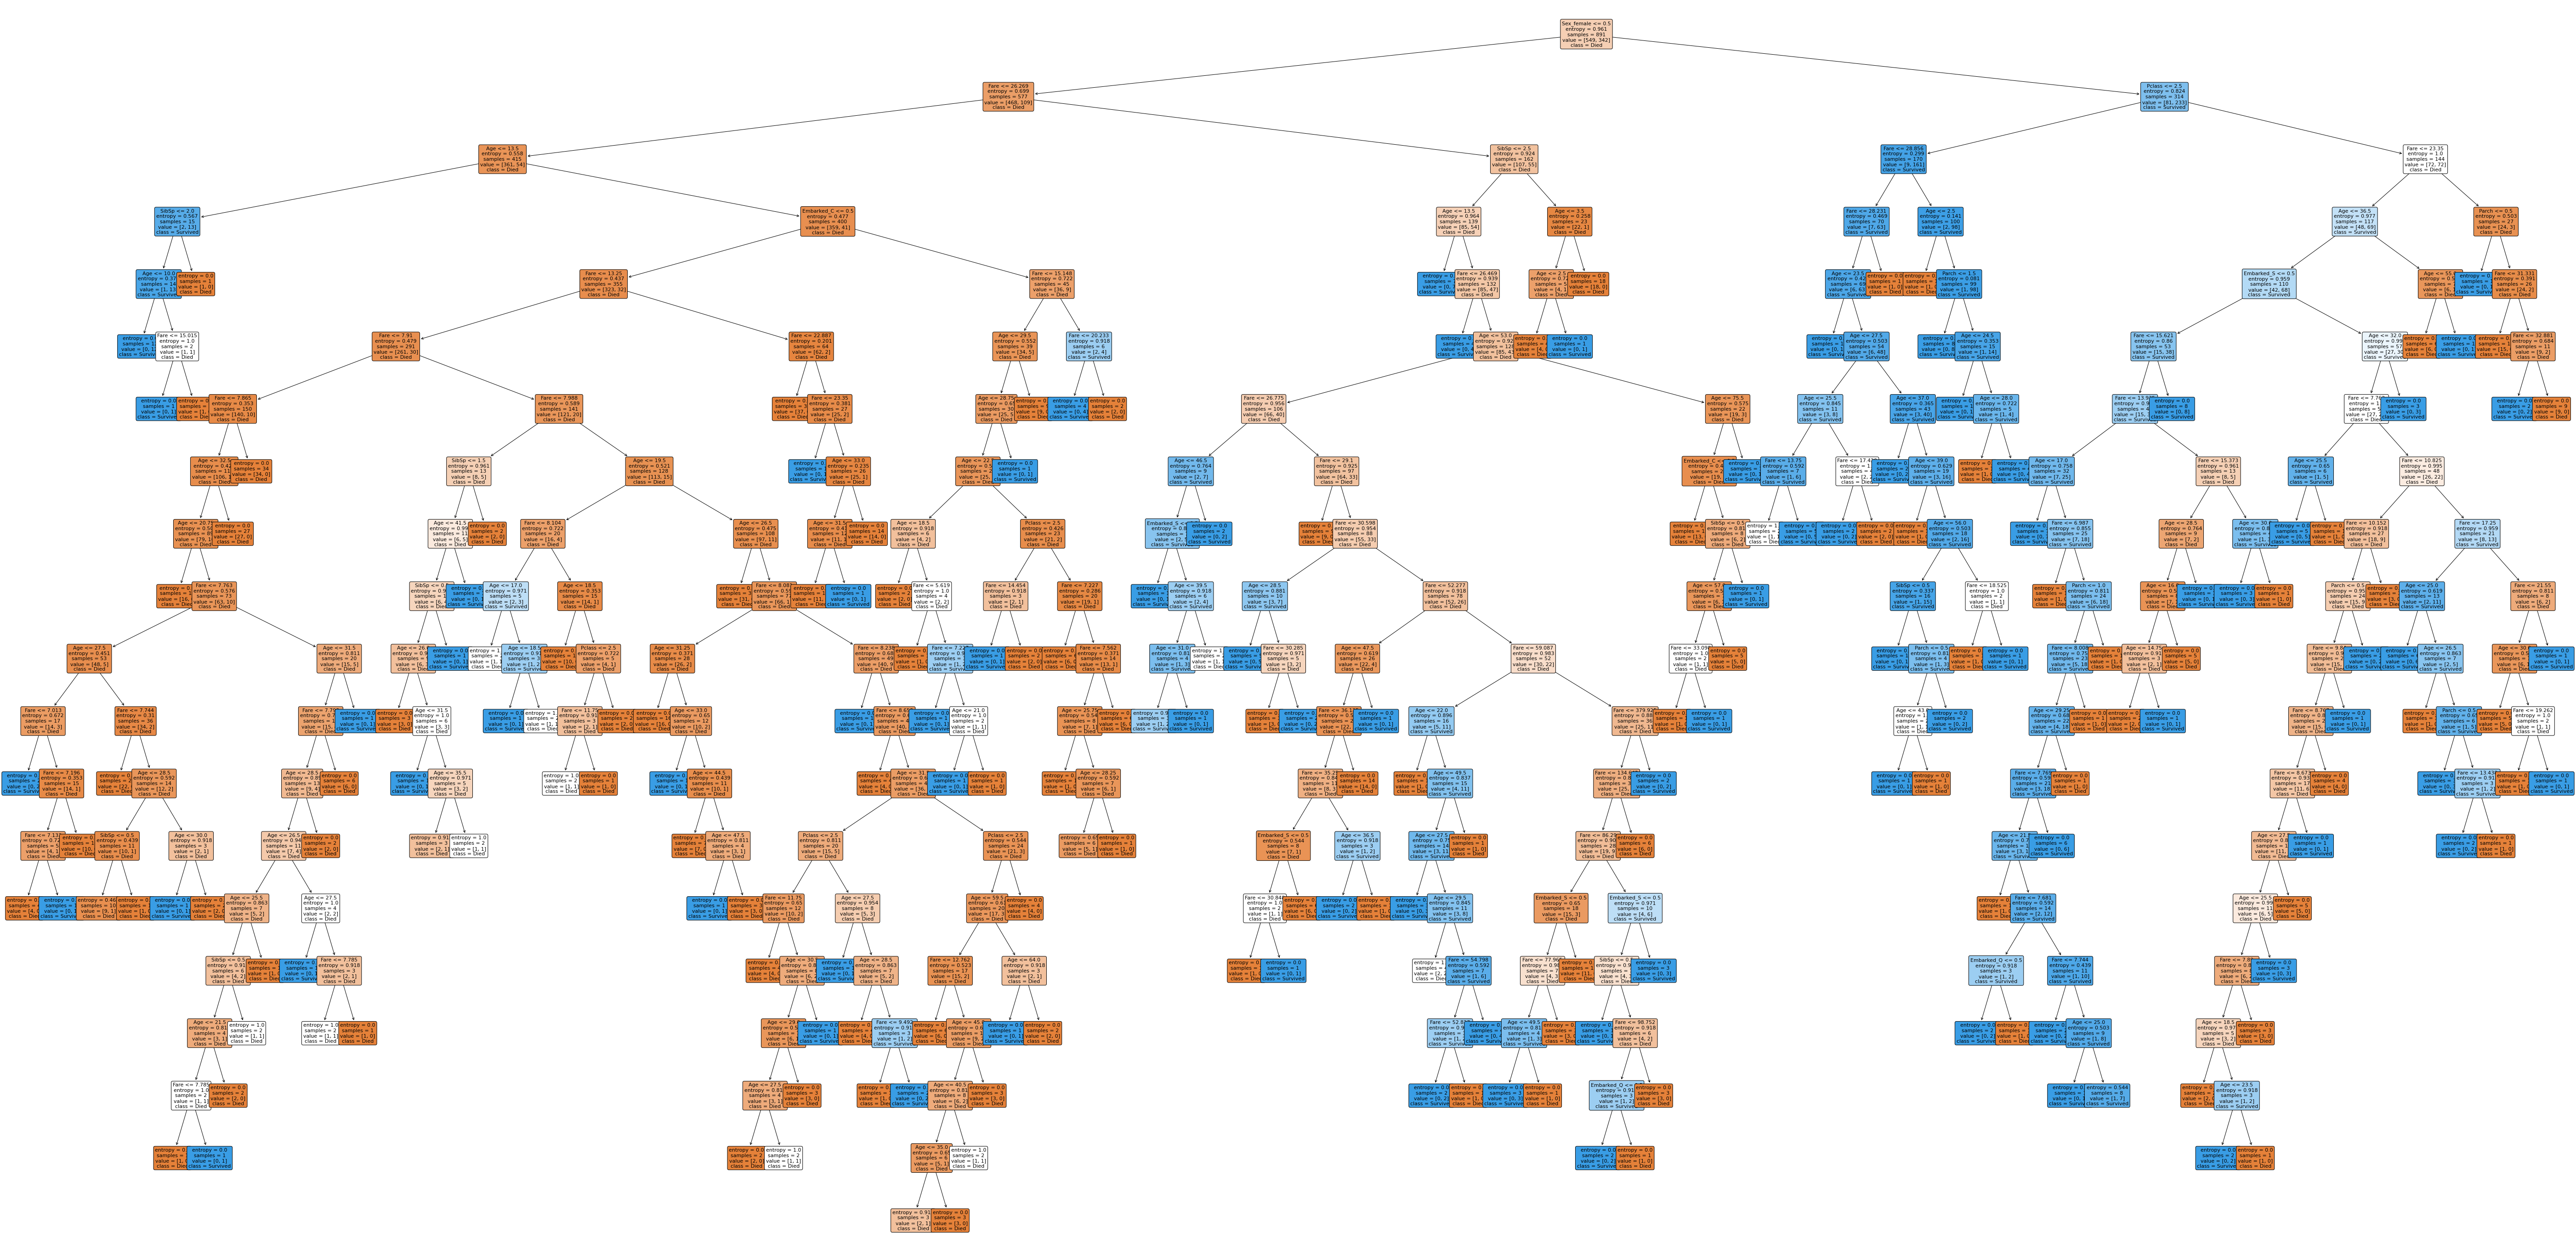

In [24]:
# визуализация

plt.figure(figsize=(100, 50))
tree.plot_tree(clf, 
               feature_names=list(X), 
               class_names=['Died', 'Survived'], 
               filled=True,
               rounded=True,
               fontsize = 11)
plt.show()

In [26]:
# разделим X и y на подмножества в соотношении 1/3 к 2/2 (тестовая выборка к тренировочной)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [31]:
X_train.shape

(596, 11)

In [32]:
X_test.shape

(295, 11)

In [36]:
# обучим дерево на тренировочной выборке

clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [38]:
# процент верных ответов тренировочной выборки

clf.score(X_train, y_train)

0.9798657718120806

In [40]:
# процент верных ответов на тестовой выборке, на которой не было обучения

clf.score(X_test, y_test)

0.7762711864406779

In [70]:
# ограничим глубину вопросов дерева к данным и обучим заново на train выборке

clf = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth=3)
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [71]:
# процент верных ответов тренировочной выборки

clf.score(X_train, y_train)

0.8238255033557047

In [72]:
# процент верных ответов на тестовой выборке, на которой не было обучения

clf.score(X_test, y_test)

0.8203389830508474

In [80]:
# посчитаем очки для выборки

scores_data = pd.DataFrame()
max_depth_values = range(1, 100)
for max_depth in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    
    temp_score_data = pd.DataFrame({'max_depth': [max_depth], 
                                    'train_score': [train_score], 
                                    'test_score': [test_score]})
    
    scores_data = scores_data.append(temp_score_data)

In [84]:
# получим глубину выборки при которой имеем максимальное количество очков на тестовой выборке

max_scores = scores_data.test_score.max()
scores_data.query('test_score == @max_scores')

,max_depth,train_score,test_score
0,4,0.833893,0.823729


<AxesSubplot:>

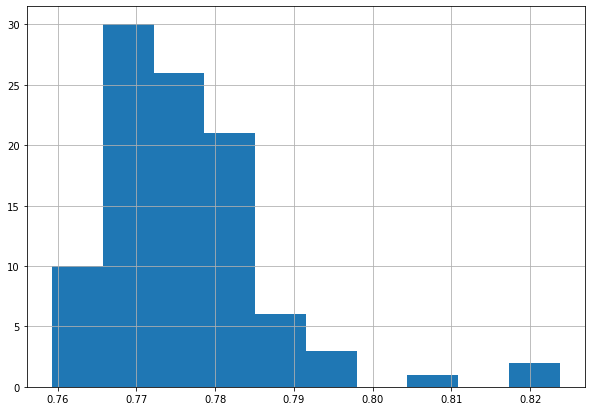

In [87]:
# визуализация распределения scores по количеству ответов

scores_data.test_score.hist(figsize=(10,7))

In [92]:
# преобразуем получившийся датасет в формат, когда тип выборки и очки объединены в две колонки соответственно

scores_data_long = pd.melt(scores_data, id_vars=['max_depth'], value_vars=['train_score', 'test_score'],
                                   var_name='set_type', value_name='score')

In [93]:
scores_data_long.head()

,max_depth,set_type,score
0,1,train_score,0.781879
1,2,train_score,0.805369
2,3,train_score,0.823826
3,4,train_score,0.833893
4,5,train_score,0.840604


<AxesSubplot:xlabel='max_depth', ylabel='score'>

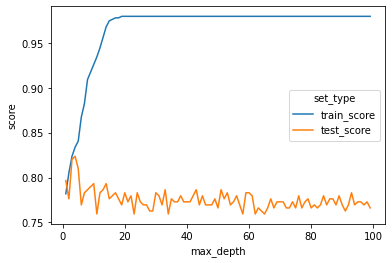

In [101]:
# визуализируем получившийся датасет, на котором видно, что наилучшие очки на глубине 3-5 и затем уровень снижается

sns.lineplot(x='max_depth', y='score', hue='set_type', data = scores_data_long)

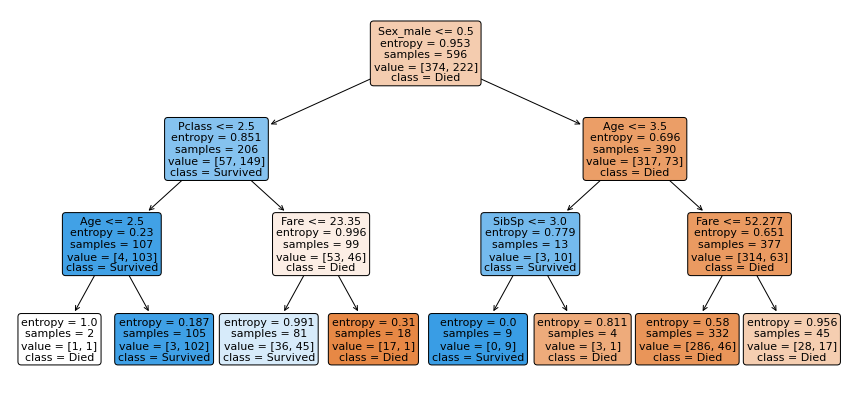

In [106]:
# визуализируем дерево для оптимальной глубины решений

clf = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth=3)
clf.fit(X_train, y_train)

plt.figure(figsize=(15, 7))
tree.plot_tree(clf, 
               feature_names=list(X), 
               class_names=['Died', 'Survived'], 
               filled=True,
               rounded=True,
               fontsize = 11)
plt.show()

In [108]:
# рассчитаем среднее значение кроссвалидированных scores

clf = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth=3)

In [110]:
cross_val_score(clf, X_train, y_train, cv=5).mean()

0.7903221288515405

In [112]:
# добавим в датасет с очками для выборки среднее значение кроссвалидированных scores

scores_data = pd.DataFrame()
max_depth_values = range(1, 100)
for max_depth in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    
    mean_cross_val_score = cross_val_score(clf, X_train, y_train, cv=5).mean()
    
    temp_score_data = pd.DataFrame({'max_depth': [max_depth], 
                                    'train_score': [train_score], 
                                    'test_score': [test_score],
                                    'cross_val_score': [mean_cross_val_score]})
    
    scores_data = scores_data.append(temp_score_data)
scores_data.head()

,max_depth,train_score,test_score,cross_val_score
0,1,0.781879,0.796610,0.781961
0,2,0.805369,0.776271,0.770196
0,3,0.823826,0.820339,0.790322
0,4,0.833893,0.823729,0.788627
0,5,0.840604,0.806780,0.802073


In [113]:
# преобразуем получившийся датасет в формат, когда тип выборки и очки объединены в две колонки соответственно

scores_data_long = pd.melt(scores_data, id_vars=['max_depth'], 
                           value_vars=['train_score', 'test_score', 'cross_val_score'],
                           var_name='set_type', value_name='score')

<AxesSubplot:xlabel='max_depth', ylabel='score'>

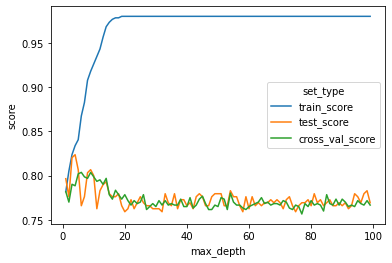

In [114]:
# визуализируем получившийся датасет, на котором видно, что наилучшие очки на глубине 6 и затем уровень снижается

sns.lineplot(x='max_depth', y='score', hue='set_type', data = scores_data_long)

In [119]:
# подтверждение наилучшего уровня глубины решений

max_cross_val_score = scores_data_long.query('set_type == "cross_val_score"').score.max()
scores_data_long.query('set_type == "cross_val_score" & score == @max_cross_val_score')

,max_depth,set_type,score
203,6,cross_val_score,0.803754


In [122]:
# расчет scores для тестовой выборки при оптимальной глубине дерева решений

best_clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=6)
best_clf.fit(X_train, y_train)
best_clf.score(X_test, y_test)

0.7694915254237288